In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/DL_SelectFields_focus_attributes.zip"

Archive:  /content/drive/MyDrive/DL_SelectFields_focus_attributes.zip
  inflating: T_ONTIME_REPORTING.csv  


In [ ]:
file_path = "T_ONTIME_REPORTING.csv"
df = pd.read_csv(file_path)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,DISTANCE_GROUP
0,1,1,1,ABE,ATL,558.0,0.0,0.0,0.0,0.0,102.0,692.0,3
1,1,1,1,ABE,ATL,1240.0,0.0,0.0,0.0,0.0,99.0,692.0,3
2,1,1,1,ABE,CLT,558.0,0.0,0.0,0.0,0.0,78.0,481.0,2
3,1,1,1,ABE,CLT,1442.0,1.0,1.0,0.0,0.0,77.0,481.0,2
4,1,1,1,ABE,CLT,1700.0,0.0,0.0,0.0,0.0,73.0,481.0,2


# **Attributes**

*  ***Month:*** Represents the month of the year, ranging from 1 (January) to 12
(December).


* ***Day of the Month:*** Specifies the day of the month, ranging from 1 to 31.

* ***Day of the Week:*** Indicates the day of the week, where 1 corresponds to Monday and 7 to Sunday.

* ***Dep_Time:*** Departure time recorded in minutes.

* ***Origin:*** The airport code (3-character unique identifier) of the flight's departure location.

* ***Dest:*** The airport code (3-character unique identifier) of the flight's arrival location.

* ***Dep_Del15:*** Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

* ***Arr_Del15:*** Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

* ***Cancelled:*** A Boolean value indicating whether the flight was canceled.

* ***Diverted:*** A Boolean value indicating whether the flight was rerouted.

* ***Air_Time:*** The total time in minutes from takeoff to landing.

* ***Distance:*** The distance traveled by the flight, measured in miles.

* ***Distance_Group:*** A categorical classification of flight distances into predefined ranges. For example:

  * Short-haul flights (0–250 miles)

  * Medium-haul flights (251–500 miles)

  * Long-haul flights (501–1000 miles)

  * Very long-haul flights (1001+ miles)


  

# Columns we are interested in:

In [ ]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'AIR_TIME',
       'DISTANCE', 'DISTANCE_GROUP'],
      dtype='object')

In [ ]:
#creating the dataframe with Column Name and Unique Values
unique_values = pd.DataFrame({
    'Column Name': df.columns,
    'Unique Values': [df[col].nunique() for col in df.columns]
})


print(unique_values)


       Column Name  Unique Values
0            MONTH              1
1     DAY_OF_MONTH             31
2      DAY_OF_WEEK              7
3           ORIGIN            334
4             DEST            334
5         DEP_TIME           1424
6        DEP_DEL15              2
7        ARR_DEL15              2
8        CANCELLED              2
9         DIVERTED              2
10        AIR_TIME            638
11        DISTANCE           1483
12  DISTANCE_GROUP             11


In [ ]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,DISTANCE_GROUP
count,547271.0,547271.000000,547271.000000,527487.000000,527413.000000,525370.000000,547271.000000,547271.000000,525370.000000,547271.000000,547271.000000
mean,1.0,15.893364,3.802931,1328.487612,0.231809,0.240611,0.037256,0.002763,116.338489,836.350400,3.818499
std,0.0,8.954236,2.012839,498.973771,0.421988,0.427455,0.189388,0.052490,70.804135,593.863755,2.321285
min,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,31.000000,1.000000
25%,1.0,8.000000,2.000000,914.000000,0.000000,0.000000,0.000000,0.000000,64.000000,403.000000,2.000000
50%,1.0,16.000000,4.000000,1325.000000,0.000000,0.000000,0.000000,0.000000,100.000000,693.000000,3.000000
75%,1.0,24.000000,6.000000,1738.000000,0.000000,0.000000,0.000000,0.000000,147.000000,1072.000000,5.000000
max,1.0,31.000000,7.000000,2400.000000,1.000000,1.000000,1.000000,1.000000,723.000000,5095.000000,11.000000


In [ ]:
#Is there any null values?
df.isnull().sum()

,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
ORIGIN,0
DEST,0
DEP_TIME,19784
DEP_DEL15,19858
ARR_DEL15,21901
CANCELLED,0
DIVERTED,0


# What is the best way to handle missing values?

**Approach 1**: Using mean when skewness is low and median when skewness is high

**Approach 2**: Use mean for all columns

**Approach 3**: Use median for all columns

**Approach 4**: Drop any row that contains NaN values

In [ ]:

def handle_missing_values(df, app_number):
    # Step 1: Remove duplicate rows first
    df = df.drop_duplicates()

    # Step 2: Fill missing values in the target column 'ARR_DEL15' using its median
    # We use the median to keep the target class (y) to be binary. If we repalce with mean -> we might end up with continuous values which is undesirable.
    df.loc[:, 'ARR_DEL15'] = df['ARR_DEL15'].fillna(df['ARR_DEL15'].median())

    # Step 3: Handle missing values
    if app_number == 1:
        df_app = df.copy()
        # Approach 1: We will use skewness to determine whether to fill missing values with mean(mean for low skew) or median(median for high skew)
        for column in df.select_dtypes(include=['number']).columns:
            if df_app[column].skew() < 1:  # If skewness is low --> use mean
                df_app[column] = df_app[column].fillna(df_app[column].mean())
            else:  # If skewness is high --> use median
                df_app[column] = df_app[column].fillna(df_app[column].median())

    elif app_number == 2:
        # Approach 2: Replace all numeric missing values with the mean
        df_app = df.copy()
        for column in df.select_dtypes(include=['number']).columns:
            df_app[column] = df_app[column].fillna(df_app[column].mean())

    elif app_number == 3:
        # Approach 3: Similar to Approach 2 (Replace all numeric missing values with the mean)
        df_app = df.copy()
        for column in df.select_dtypes(include=['number']).columns:
            df_app[column] = df_app[column].fillna(df_app[column].mean())

    elif app_number == 4:
        # Approach 4: Remove rows that contain any missing values
        df_app = df.dropna()

    else:
        raise ValueError("Invalid app_number. Please choose a value between 1 and 4.")

    return df_app

# Understanding the Distribution of our Target Class

**Observation:** - Class Imbalance

The distribution shows class imbalance where the number of instances with 0 (negative class) is significantly higher than those with 1 (positive class)

Due to this, accuracy might not be the best metric to evaluate any model's performance. Let's focus on Precission, Recall and F-1 Score

<Axes: xlabel='ARR_DEL15', ylabel='count'>

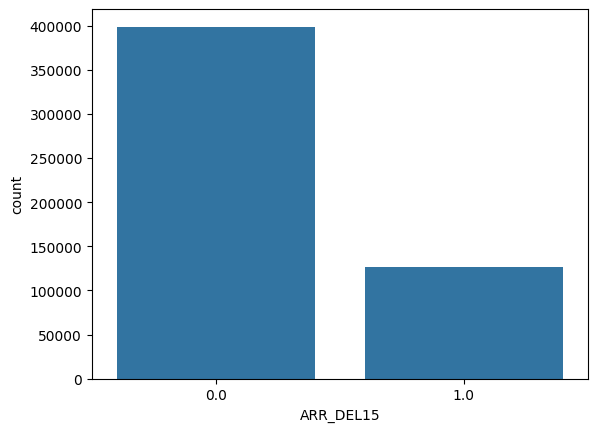

In [ ]:
import seaborn as sns

# Selecting an approach 4 to handle missing values
app_number = 4
df_cleaned = handle_missing_values(df, app_number)

# removing the target variables after handling missing values
target = df_cleaned['ARR_DEL15']
sns.barplot(target.value_counts())

# Outlier Detection

**Observation:** The dataset size reduced by roughly 35% has a significant impact on model performance. For now -  I m not removing these data points from our df. Let's decide later.


In [ ]:
import pandas as pd


def remove_outliers_iqr(df):

    df_no_outliers = df.copy()

    # Step 1: Iterating through each numeric column to calculate the Interquartile Range (IQR) and identifying outliers
    for col in df.select_dtypes(include=['number']).columns:

        # we have calculated the 25th (Q1) and 75th (Q3) percentiles
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Step 2: Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1  # Interquartile range between the 25th and 75th percentiles

        # Step 3: Define the lower and upper bounds for identifying outliers
        lower_bound = Q1 - 1.5 * IQR  # Any value below this is considered as an outlier
        upper_bound = Q3 + 1.5 * IQR  # Any value above this is considered as an outlier

        # Step 4: Filter the dataframe to retain only values within the defined bounds
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    return df_no_outliers

# Call the function to remove outliers from the dataset using IQR method
df_no_outliers = remove_outliers_iqr(df)

# Print the original and filtered DataFrame shapes for comparison
print(f"Original Data Shape: {df.shape}")
print(f"Filtered Data Shape: {df_no_outliers.shape}")


Original Data Shape: (547271, 13)
Filtered Data Shape: (354040, 13)


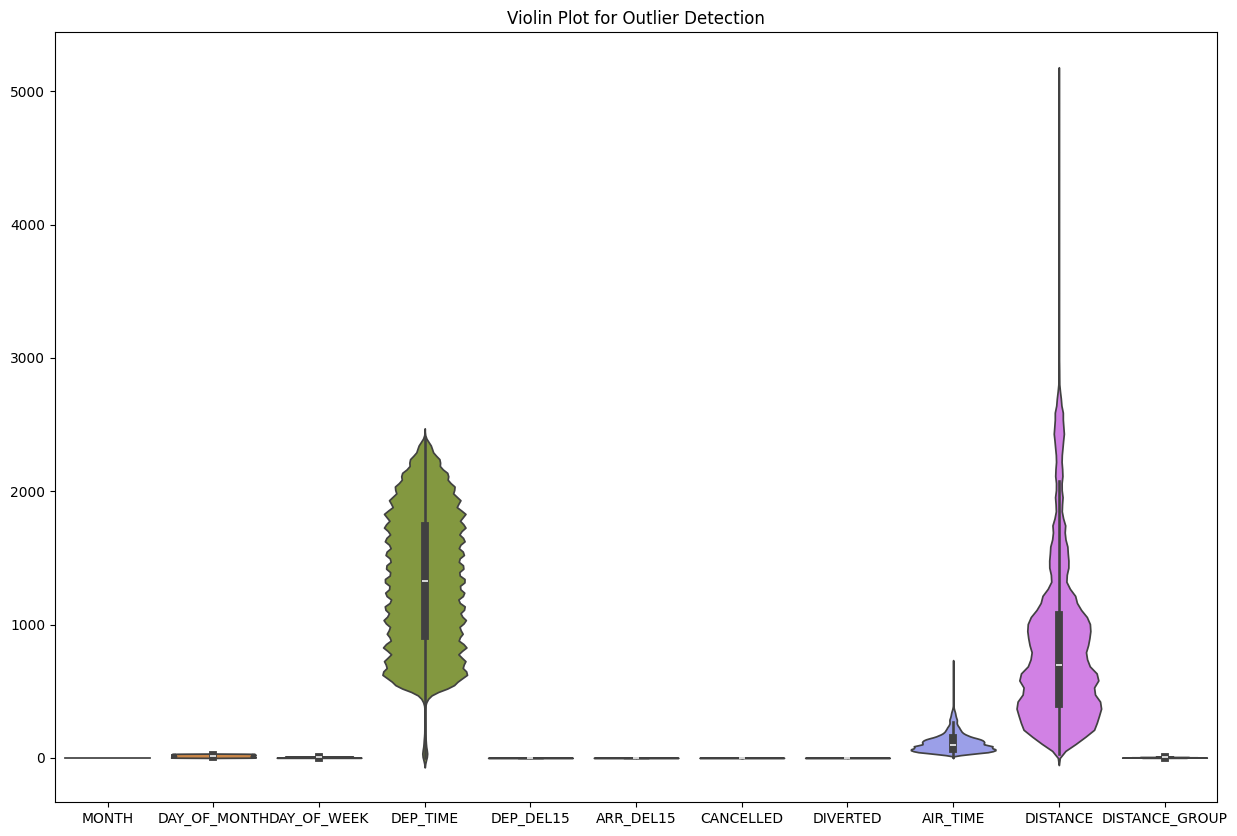

In [ ]:
# Creating a violin plot to visualize the distribution and potential outliers
plt.figure(figsize=(15, 10))
# You can select a single column or multiple columns(entire dataframe)
sns.violinplot(data=df) # Visualizing the distribution of the entire dataset
plt.title('Violin Plot for Outlier Detection')
plt.show()

# Which is the best encoding for our situation?

We tried 3 types of encoding


1.   One Hot Encoding
2.   Frequency Encoding
3.   Label Encoding


Figured out Label Encoding captures most of the information. Performance of 1 and 2 were almost same. Gave poor prediction results/ didn't capture enough info

In [ ]:
# X= pd.get_dummies(X, columns=['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST'], drop_first=True, dtype = int)
# for col in ['ORIGIN', 'DEST']:
#     freq_map = X[col].value_counts(normalize=True)  # Get category frequencies
#     X[col] = X[col].map(freq_map)  # Replace category with its frequency

In [ ]:
# Handling missing values in the DataFrame using the approach 4
app_number = 4
df_cleaned = handle_missing_values(df, app_number)

# Sampling 5000 rows for quicker processing
df_sampled_cleaned = df_cleaned.sample(n=5000, random_state=42)

# We have initialized the LabelEncoder for encoding categorical variables
label_encoder = LabelEncoder()
label_encoder.fit(pd.concat([df_sampled_cleaned['ORIGIN'], df_sampled_cleaned['DEST']]))

# Applying the LabelEncoder transformation to 'ORIGIN' and 'DEST' columns to convert them into numeric labels
df_sampled_cleaned['ORIGIN'] = label_encoder.transform(df_sampled_cleaned['ORIGIN'])
df_sampled_cleaned['DEST'] = label_encoder.transform(df_sampled_cleaned['DEST'])

# Prepare features (X) and target (y) for modeling
X = df_sampled_cleaned.drop(columns=['ARR_DEL15'])
y = df_sampled_cleaned['ARR_DEL15']

# Logistic Regression Model

## Why did we scale the data for Logistic Regression?



1.   Gradient Descent Convergence - it was not converging earlier because of different scales
2.   Improved interpretability - all features contribute equally to the model



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Splitting the data into training(80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

Accuracy: 0.9080

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       765
         1.0       0.83      0.77      0.80       235

    accuracy                           0.91      1000
   macro avg       0.88      0.86      0.87      1000
weighted avg       0.91      0.91      0.91      1000



# Decision Tree Classification

## Does scaling affect DT Classifier?

As you can see, it is invariance to sclaing. Whether you scale or not, the splits made by the decision tree will remain the same because the algorithm simply compares feature values.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
# Training the model on the training data
model.fit(X_train, y_train)

# Predicting the target values (y) for the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

Accuracy: 0.8260

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       765
         1.0       0.63      0.63      0.63       235

    accuracy                           0.83      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.83      0.83      0.83      1000



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
# Training the model on the training data
model.fit(X_train_scaled, y_train)

# Predicting the target values for the test set
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

Accuracy: 0.8270

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       765
         1.0       0.63      0.63      0.63       235

    accuracy                           0.83      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.83      0.83      0.83      1000



# Answering Interesting Questions

## Q1) In this specific year, what are the top 10 busiest airports?

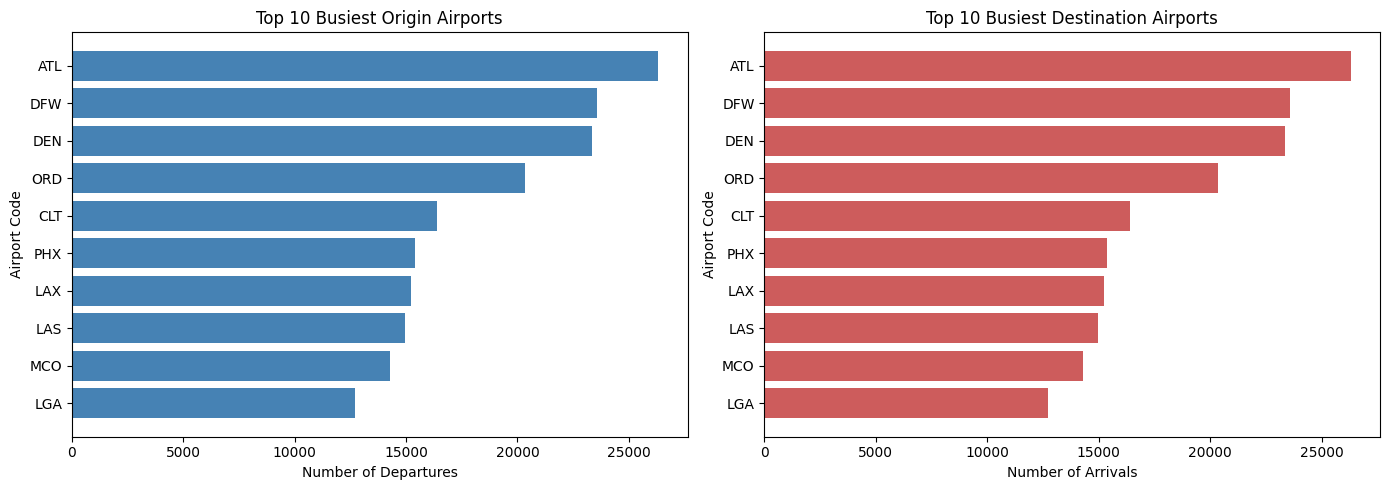

In [ ]:
# We have taken the top 10 busiest origin airports based on the number of departures
top_origins = df['ORIGIN'].value_counts().head(10)
# We have taken the top 10 busiest destination airports based on the number of arrivals
top_destinations = df['DEST'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# We have plotted the horizontal bar chart for top origin airports
axes[0].barh(top_origins.index[::-1], top_origins.values[::-1], color='steelblue')
axes[0].set_title('Top 10 Busiest Origin Airports')
axes[0].set_xlabel('Number of Departures')
axes[0].set_ylabel('Airport Code')

# We have plotted the horizontal bar chart for top destination airports
axes[1].barh(top_destinations.index[::-1], top_destinations.values[::-1], color='indianred')
axes[1].set_title('Top 10 Busiest Destination Airports')
axes[1].set_xlabel('Number of Arrivals')
axes[1].set_ylabel('Airport Code')

plt.tight_layout()
plt.show()


**Observation:**


1.  There is no major directional bias in the flight data.
2.  If an airport is primarily a hub, you'd expect a very close match between take-offs and landings.



## Q2) What is the average delay time for each airline?


In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,DISTANCE_GROUP
0,1,1,1,ABE,ATL,558.0,0.0,0.0,0.0,0.0,102.0,692.0,3
1,1,1,1,ABE,ATL,1240.0,0.0,0.0,0.0,0.0,99.0,692.0,3
2,1,1,1,ABE,CLT,558.0,0.0,0.0,0.0,0.0,78.0,481.0,2
3,1,1,1,ABE,CLT,1442.0,1.0,1.0,0.0,0.0,77.0,481.0,2
4,1,1,1,ABE,CLT,1700.0,0.0,0.0,0.0,0.0,73.0,481.0,2
